In [2]:
# --------------------------------------------------------------
# Dependencies
# --------------------------------------------------------------

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

import itertools

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler




In [3]:
'''
# --------------------------------------------------------------
# Plot settings
# --------------------------------------------------------------

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2
'''

'\n# --------------------------------------------------------------\n# Plot settings\n# --------------------------------------------------------------\n\nplt.style.use("fivethirtyeight")\nplt.rcParams["figure.figsize"] = (20, 5)\nplt.rcParams["figure.dpi"] = 100\nplt.rcParams["lines.linewidth"] = 2\n'

In [4]:
# --------------------------------------------------------------
# Import Dataset 
# --------------------------------------------------------------


studentInfo = pd.read_csv("./uci-open-university-learning-analytics-dataset/studentInfo.csv")

assessments = pd.read_csv("./uci-open-university-learning-analytics-dataset/assessments.csv")

studentAssessment = pd.read_csv("./uci-open-university-learning-analytics-dataset/studentAssessment.csv")

studentVle = pd.read_csv("./uci-open-university-learning-analytics-dataset/studentVle.csv")



In [5]:
'''
# --------------------------------------------------------------
# Normalization of the dataset
# --------------------------------------------------------------

sI_df = studentInfo

print("\nstudentInfo - original types\n")
print(sI_df.dtypes)

encoder = LabelEncoder()
for coluna in sI_df :
    sI_df[coluna] = encoder.fit_transform(sI_df[coluna])
    
print("\nstudentInfo - encoded types\n")
print(studentInfo.dtypes)

X =np.asarray(studentInfo[['gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability']]) # Features
y =np.asarray(studentInfo[['final_result']])  # Label sem normalizar

X = preprocessing.StandardScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y.ravel())

print(studentInfo.head())
'''


'\n# --------------------------------------------------------------\n# Normalization of the dataset\n# --------------------------------------------------------------\n\nsI_df = studentInfo\n\nprint("\nstudentInfo - original types\n")\nprint(sI_df.dtypes)\n\nencoder = LabelEncoder()\nfor coluna in sI_df :\n    sI_df[coluna] = encoder.fit_transform(sI_df[coluna])\n    \nprint("\nstudentInfo - encoded types\n")\nprint(studentInfo.dtypes)\n\nX =np.asarray(studentInfo[[\'gender\',\'region\',\'highest_education\',\'imd_band\',\'age_band\',\'num_of_prev_attempts\',\'studied_credits\',\'disability\']]) # Features\ny =np.asarray(studentInfo[[\'final_result\']])  # Label sem normalizar\n\nX = preprocessing.StandardScaler().fit_transform(X)\ny = LabelEncoder().fit_transform(y.ravel())\n\nprint(studentInfo.head())\n'

In [6]:
'''
# ---------------------------------
# Criar DataFrame para visualização
# ---------------------------------
df = pd.DataFrame(X, columns=['Gender','Region','Highest Education','Imd Band','Age Band','Prev Attempts','Credits','Disability'])
df['Final Result'] = y  # Adicionar os rótulos ao DataFrame

'''

"\n# ---------------------------------\n# Criar DataFrame para visualização\n# ---------------------------------\ndf = pd.DataFrame(X, columns=['Gender','Region','Highest Education','Imd Band','Age Band','Prev Attempts','Credits','Disability'])\ndf['Final Result'] = y  # Adicionar os rótulos ao DataFrame\n\n"

In [7]:
# --------------------------------------------------------------
# Junção das Tabelas
# --------------------------------------------------------------

# Juntar informações das avaliações
dfs = studentInfo.merge(studentAssessment, on="id_student", how="left")
print("\nstudentAssessment\n")
print(studentAssessment.dtypes)

# Juntar com detalhes das avaliações
assessments.drop(columns=["code_module", "code_presentation"], inplace=True) #Remove colunas que vão ser duplicadas
dfs = dfs.merge(assessments, on="id_assessment", how="left")
print("\nassessments\n")
print(assessments.dtypes)

# Juntar interações com a plataforma
dfs = dfs.merge(studentVle.groupby("id_student")["sum_click"].sum().reset_index(), on="id_student", how="left")

print("\nstudentVle\n")
print(studentVle.dtypes)


dfs.drop(columns=["id_student", "id_assessment","code_presentation"], inplace=True) #Remover colunas irrelevantes 


# Questao para Final Result: tem 4: Fail, Withdrawn, Pass and Disitinction. Devo fazer drop das desistencias e juntar os de distinção ao aprovado ?


studentAssessment

id_assessment      int64
id_student         int64
date_submitted     int64
is_banked          int64
score             object
dtype: object

assessments

id_assessment        int64
assessment_type     object
date                object
weight             float64
dtype: object

studentVle

code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64
dtype: object


In [8]:
print("\ndfs\n")
print(dfs.dtypes)
print(dfs.head())

print("\nnunique\n")
print(dfs.nunique())
print(dfs.describe().T)


print("\nisnull\n")
print(dfs.isnull().sum())
print((dfs.isnull().sum() / len(dfs) * 100).apply(lambda x: f"{x:.2f}%"))

print("\nshape\n")
print(dfs.shape)


dfs

code_module              object
gender                   object
region                   object
highest_education        object
imd_band                 object
age_band                 object
num_of_prev_attempts      int64
studied_credits           int64
disability               object
final_result             object
date_submitted          float64
is_banked               float64
score                    object
assessment_type          object
date                     object
weight                  float64
sum_click               float64
dtype: object
  code_module gender               region highest_education imd_band age_band  \
0         AAA      M  East Anglian Region  HE Qualification  90-100%     55<=   
1         AAA      M  East Anglian Region  HE Qualification  90-100%     55<=   
2         AAA      M  East Anglian Region  HE Qualification  90-100%     55<=   
3         AAA      M  East Anglian Region  HE Qualification  90-100%     55<=   
4         AAA      M  East Angl

In [9]:
'''
# Exploratory Data Analysis


# Categorical variables: Count plot, Bar Chart, Pie Plot, etc.

# Numerical Variables: Histogram, Box Plot, Density Plot, etc.
'''

'\n# Exploratory Data Analysis\n\n\n# Categorical variables: Count plot, Bar Chart, Pie Plot, etc.\n\n# Numerical Variables: Histogram, Box Plot, Density Plot, etc.\n'

In [10]:
# --------------------------------------------------------------
# Identificação das Features
# --------------------------------------------------------------
# Identificar colunas categóricas
categorical_cols = ["code_module", "gender", "region", "highest_education", "imd_band", "age_band", "disability", "assessment_type", "final_result","is_banked"]
# Selecionar features numericas
numeric_cols =["date_submitted","num_of_prev_attempts", "sum_click","date","studied_credits", "weight","score"]

In [11]:
for col in numeric_cols:
    print(f"Coluna: {col}")
    print(dfs[col].unique())  # Mostra valores únicos
    print("-" * 40)

for col in categorical_cols:
    print(f"Coluna: {col}")
    print(dfs[col].unique())  # Mostra valores únicos
    print("-" * 40)


Coluna: date_submitted
[ 18.  53. 115. 164. 212.  22.  52. 121.  nan  17.  51. 165. 213.  26.
  75. 124. 181. 222.  19.  64. 117. 166. 215.  20.  54. 216.  57. 116.
 227. 173.   9. 114. 161. 214. 119.  50.  -1. 198. 120. 170.  21. 122.
 220. 211.  49. 106. 157. 202. 171. 218.  16.  30.  62.  32.  55.  10.
  61. 113. 123. 131.  47. 163. 208.  25. 127. 180.  15. 125. 176.  65.
  56. 177. 183. 172. 138. 178. 219.  63.  59. 108.  90.  66. 129. 168.
  68. 239. 209. 118. 158.  24.  33.  60.  58. 159. 217.  27. 179.  23.
 210.  42. 153. 175.  37.  67. 169.  29.  72. 110. 174.  83. 136. 226.
  48. 100. 152.   7. 223. 102. 156. 204.  69. 221.  92. 132.  12. 107.
 150. 201.  14. 112. 111. 162.  94. 133. 128. 234. 194. 146. 167.  70.
  36.  85. 139. 130. 135. 187. 203.  78. 134. 188. 126. 160. 238. 207.
  95. 185. 137.  40. 144. 237.  45. 155. 109.  38.  79. 184.  84.  74.
 224.  11.  35.  71.  13.  46. 205. 235.  44.  39.   5.  28.  93.  31.
  76.  88. 189.  89. 104. 193. 105.  87. 186.  81. 182

In [14]:
# --------------------------------------------------------------
# Normalização do data set
# --------------------------------------------------------------

# Substituir '?' por NaN
dfs.replace('?', np.nan, inplace=True)

# --------------------------------------------------------------
# numeric_cols
# --------------------------------------------------------------

# Converter colunas numéricas corretamente
dfs[numeric_cols] = dfs[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Preencher valores NaN com a média da respetiva coluna
dfs[numeric_cols] = dfs[numeric_cols].fillna(dfs[numeric_cols].mean())

# --------------------------------------------------------------
# categorical_cols
# --------------------------------------------------------------

# Remover linhas com NaN
dfs.dropna(subset=categorical_cols, inplace=True)

# Remover linhas com 'Withdrawn'
dfs = dfs.loc[dfs['final_result'] != 'Withdrawn']

# Substituir 'Distinction' por 'Pass'
dfs['final_result'] = dfs['final_result'].replace('Distinction', 'Pass')



In [15]:
for col in numeric_cols:
    print(f"Coluna: {col}")
    print(dfs[col].unique())  # Mostra valores únicos
    print("-" * 40)

for col in categorical_cols:
    print(f"Coluna: {col}")
    print(dfs[col].unique())  # Mostra valores únicos
    print("-" * 40)

Coluna: date_submitted
[ 18.  53. 115. 164. 212.  22.  52. 121.  17.  51. 165. 213.  26.  75.
 124. 181. 222.  19.  64. 117. 166. 215.  20.  54. 216.  57. 116. 227.
 173. 214. 119.  50. 114. 198. 120. 170.  21. 122. 220.  49. 106. 157.
 202. 171. 218.  16.  55.  10.  61. 113. 123. 131.  47. 163. 208.  25.
  15. 161.  65.  56. 127. 177. 183. 172. 138. 178. 219. 108.  66. 168.
 239. 209. 118. 158.  24.  33.  68.  60.  58. 159. 217. 179.  23. 210.
  42. 153. 175.  37.  67. 169. 180. 110.  63. 176. 125. 174.  83. 136.
 226.  48. 100. 152.  59.   7. 223. 102. 156. 204. 221.  92.  12. 107.
 150. 201.  14. 112. 111. 162.  69.  94. 128.  29. 194. 211. 146. 167.
  27.  70.  30.  62. 130.   9. 135. 187. 203.  78. 134. 188. 126. 160.
 238. 207.  95. 185. 137.  -1. 132.  90. 144. 237.  45. 155. 109.  38.
  79. 184.  84.  74. 224.  11. 129.  35. 139. 234.  13.  46. 205. 235.
  44.  39.   5.  28.  76.  88. 189.  89. 104. 193.  87. 186.  81.  85.
 182.  97.  -4.  86.  36.   6.  43. 145.  41. 196. 148

date_submitted
Skew : 0.11


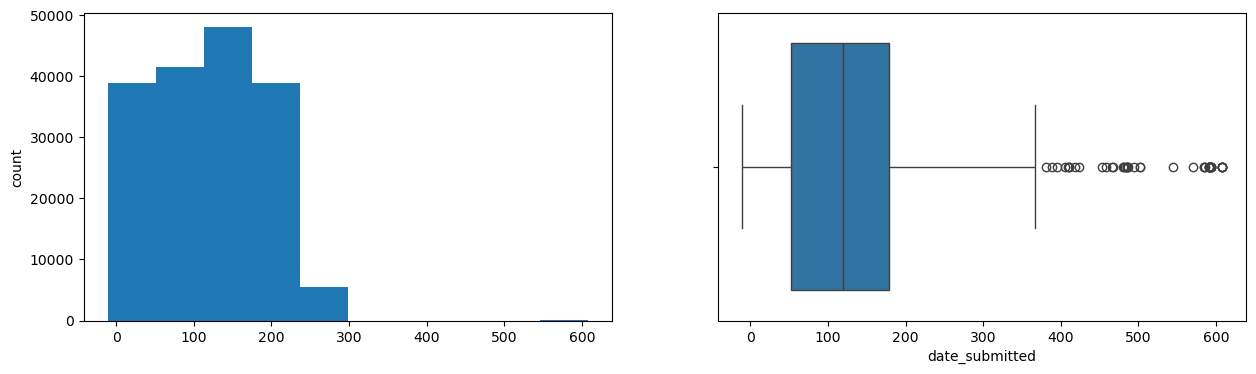

num_of_prev_attempts
Skew : 3.87


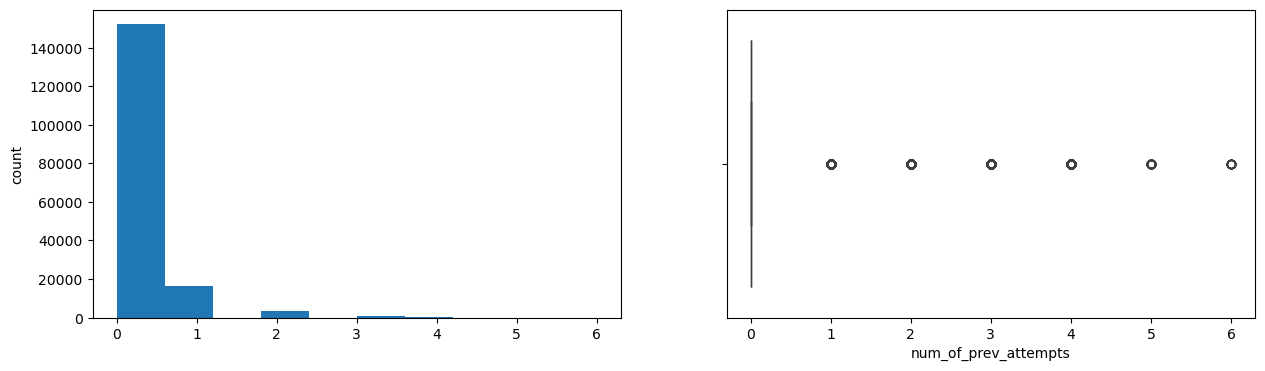

sum_click
Skew : 2.78


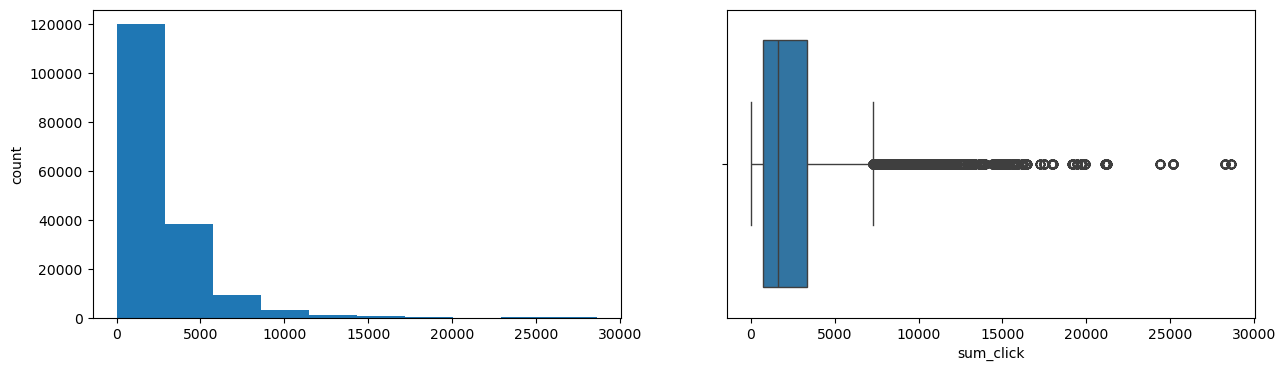

date
Skew : -0.02


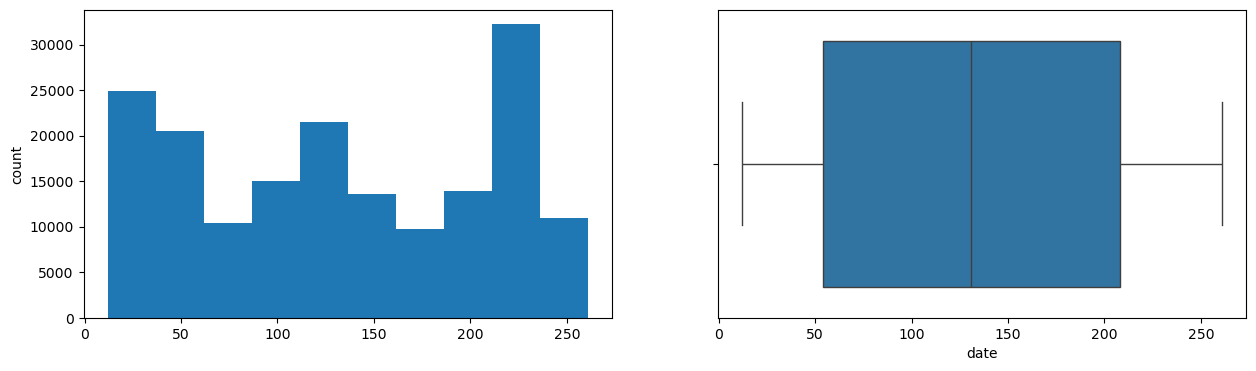

studied_credits
Skew : 1.74


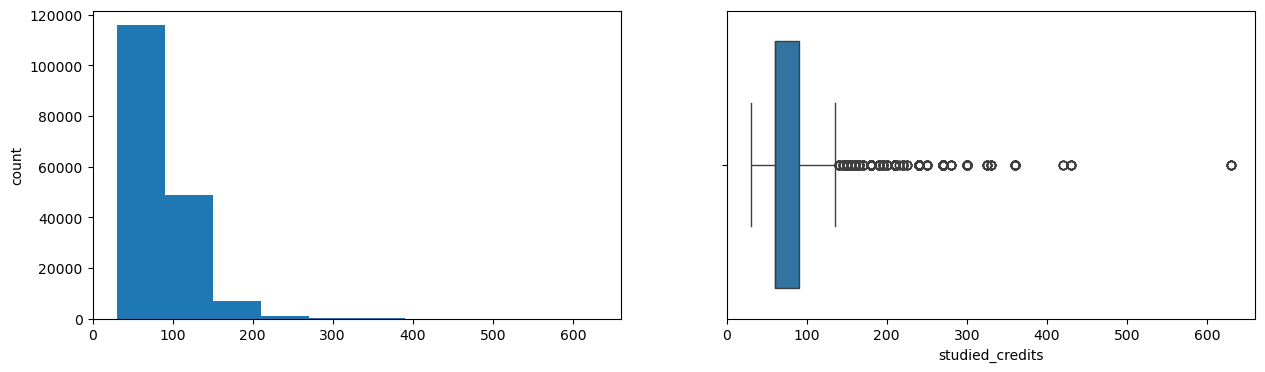

weight
Skew : 3.15


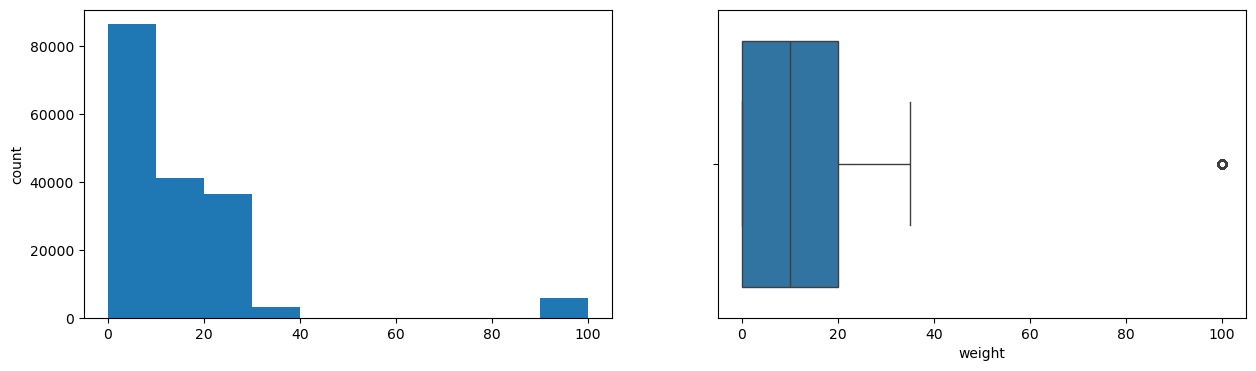

score
Skew : -1.06


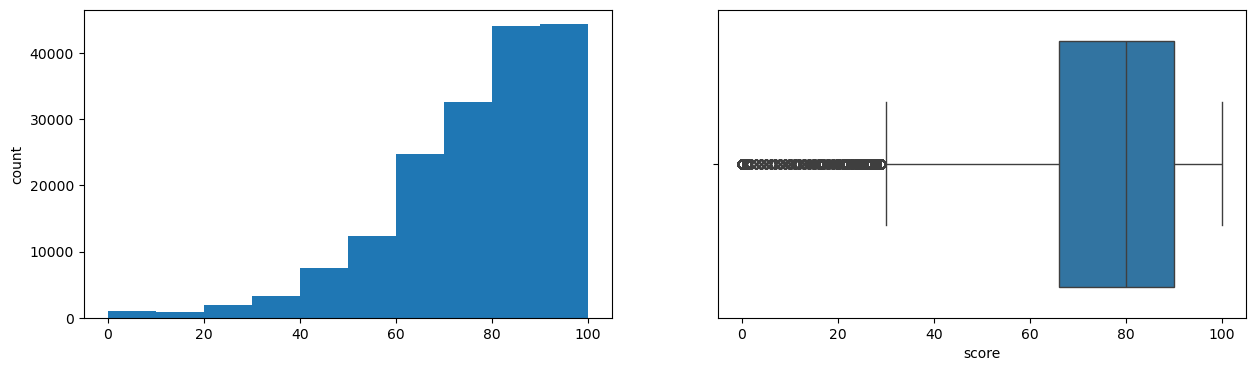

In [16]:
# ---------------------------------
# EDA Univariate Analysis 
# Visualização com Boxplot
# ---------------------------------
for col in numeric_cols:
    print(col)
    print('Skew :', round(dfs[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    dfs[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dfs[col])
    plt.savefig(f"{col}boxplot.png", dpi=300, bbox_inches='tight')
    plt.show()


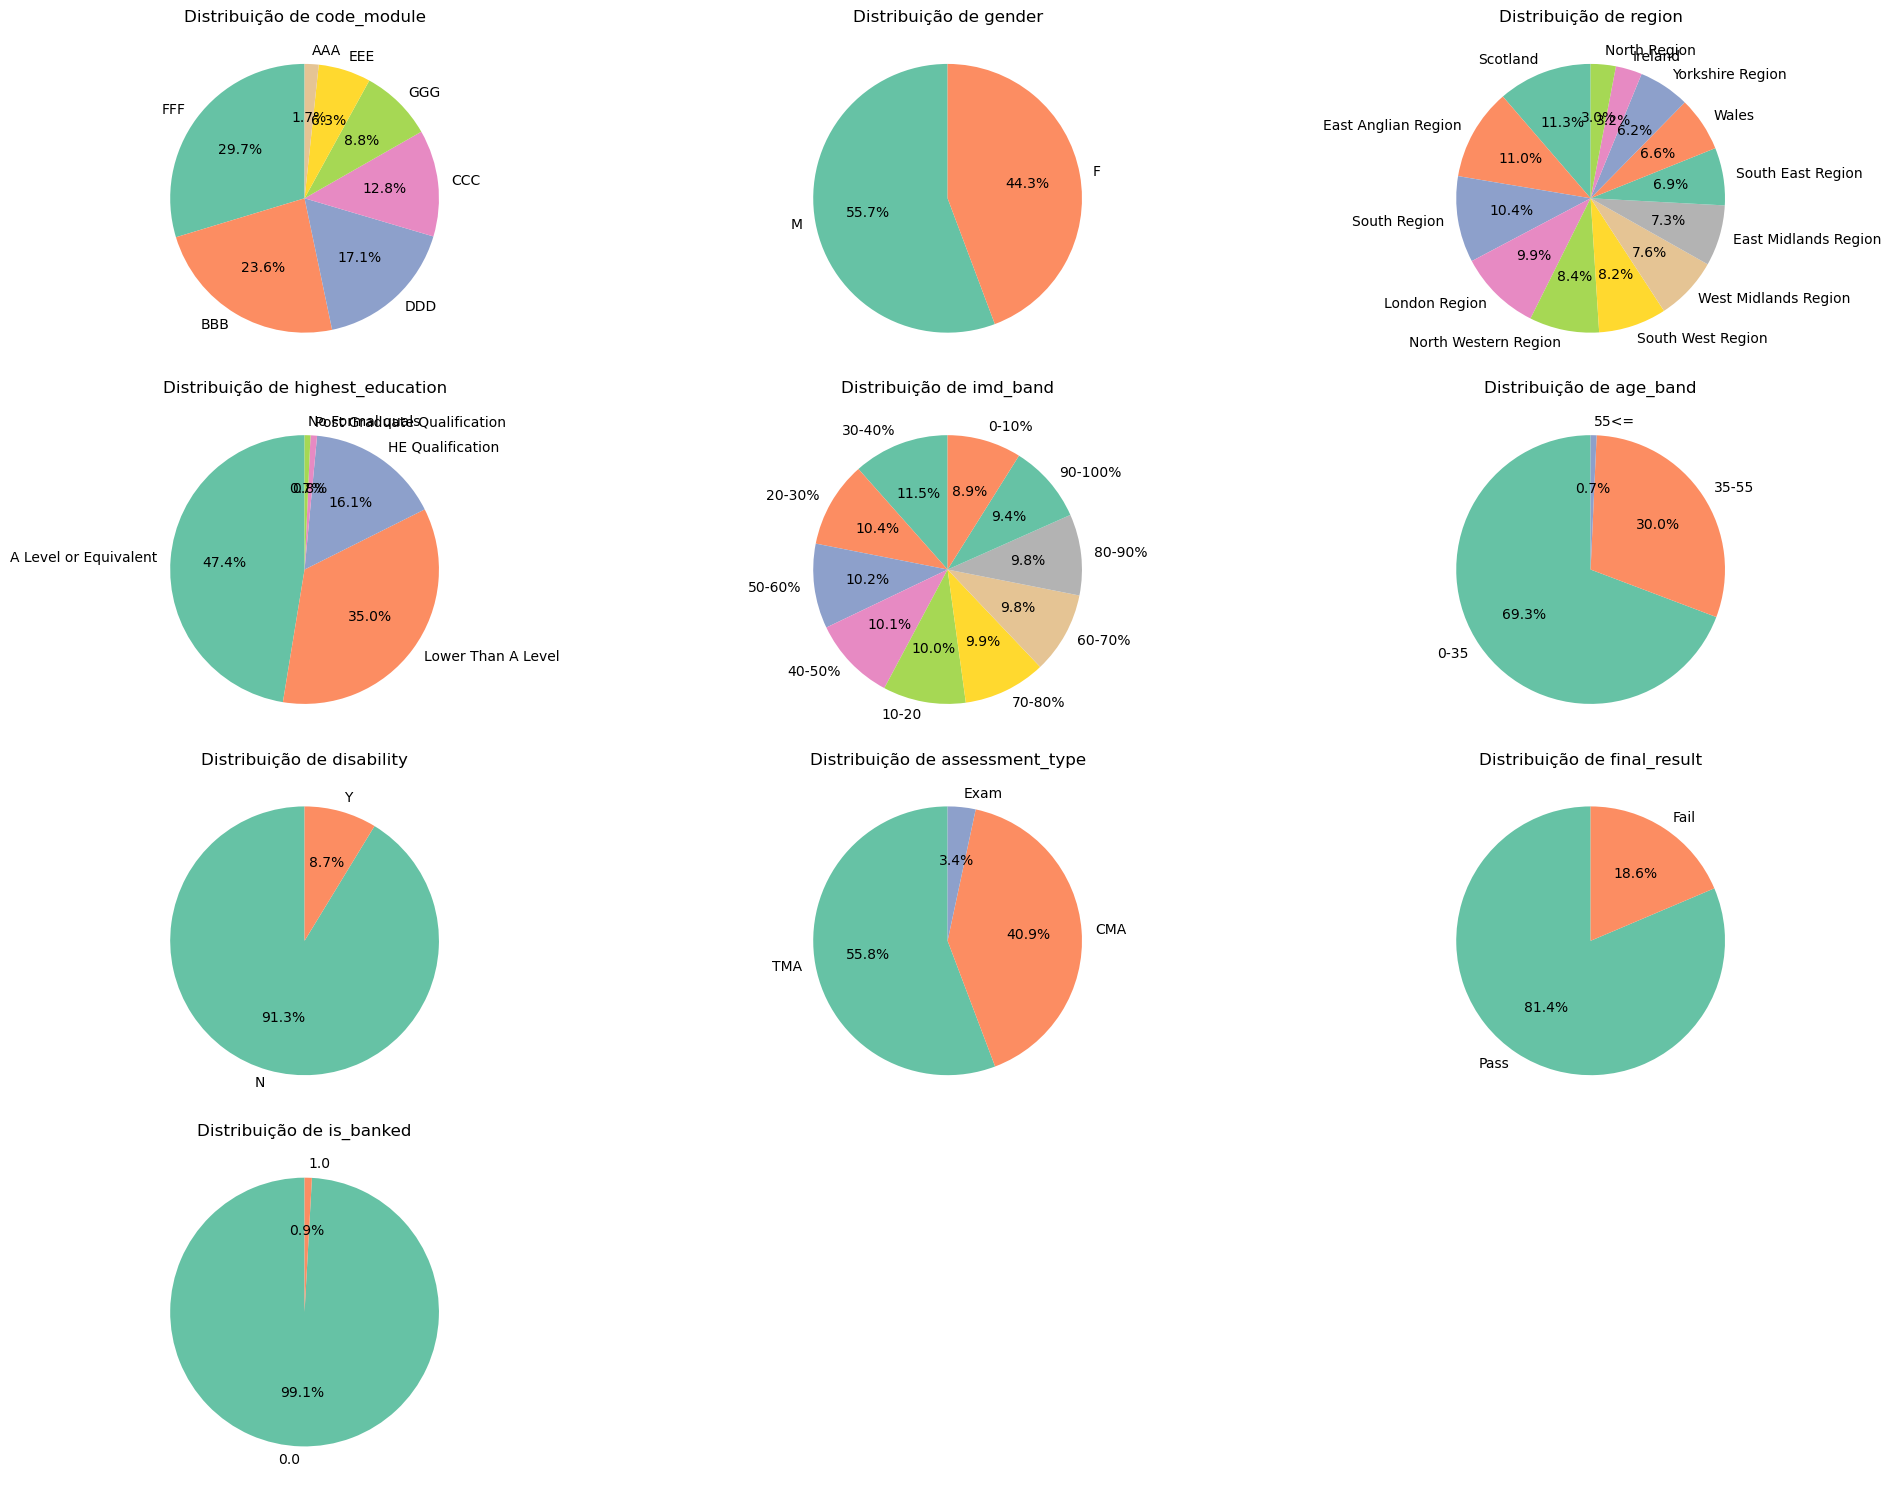

In [17]:
# ---------------------------------
# EDA Analysis 
# Visualização com Pieplot
# ---------------------------------
# Configuração para exibir os gráficos
plt.figure(figsize=(20, 15))

# Criar os gráficos de pizza
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  # Organizar os gráficos em uma grade 3x4
    # Contar a frequência das categorias
    counts = dfs[col].value_counts()
    # Criar o gráfico de pizza
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(counts)))
    plt.title(f'Distribuição de {col}')
    
# Ajuste o layout
plt.tight_layout()

# Exibir os gráficos
plt.savefig(f"pieplot.png", dpi=300, bbox_inches='tight')
plt.show()

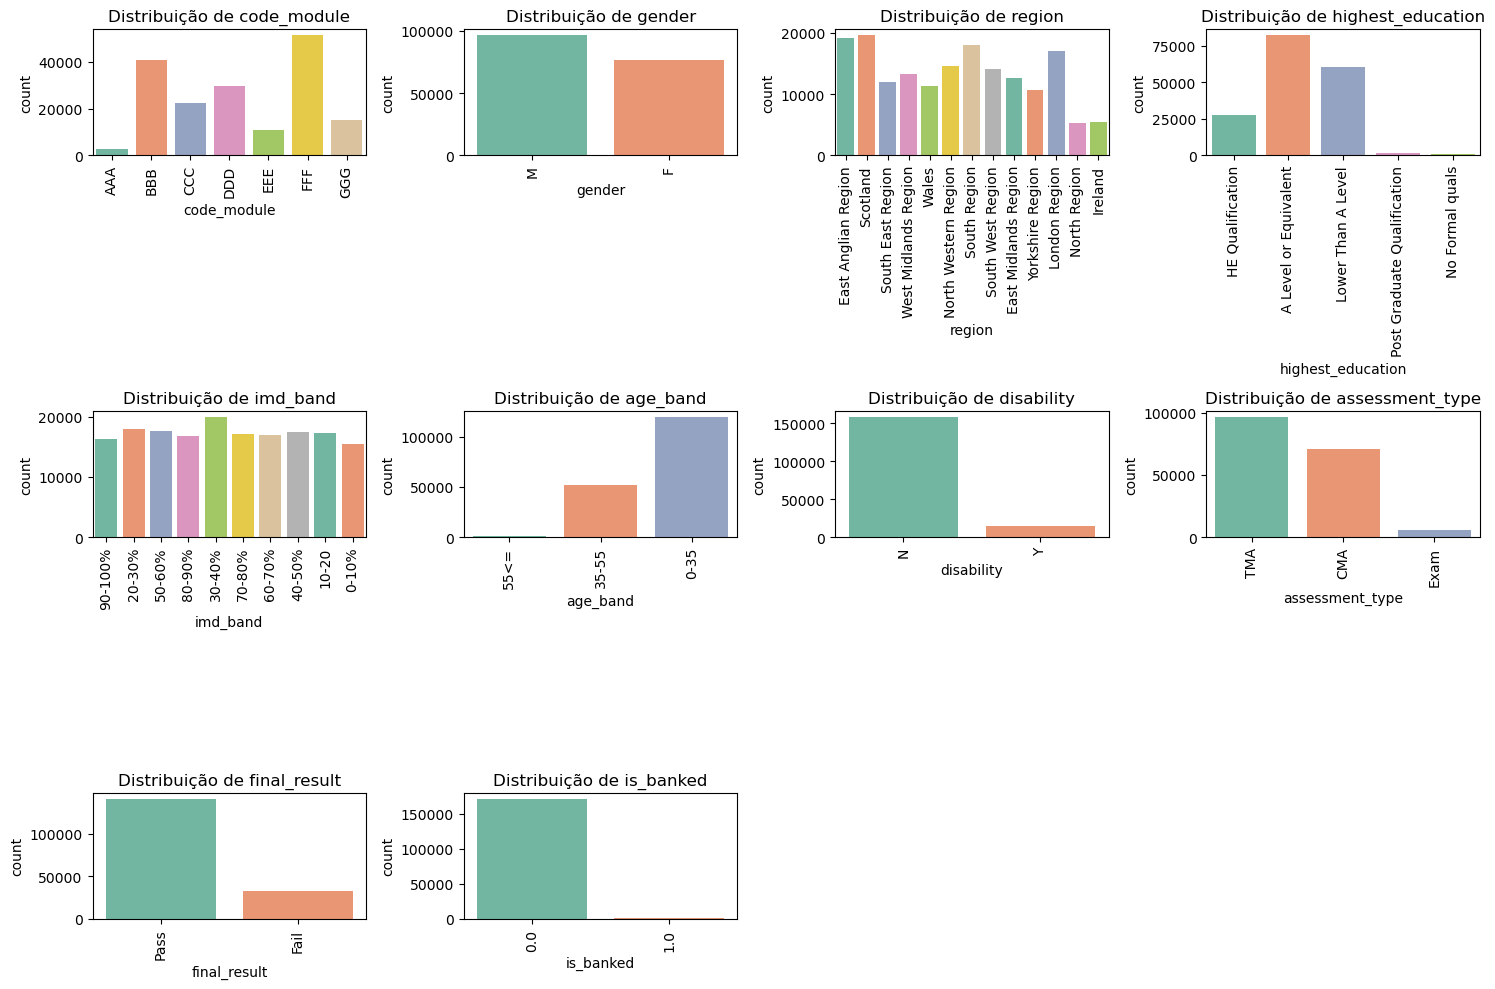

In [18]:
# ---------------------------------
# EDA Bivariate Analysis 
# Visualização com Countplot
# ---------------------------------

# Configuração para exibir os gráficos
plt.figure(figsize=(15, 10))

# Criar os gráficos
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)  # Organizar os gráficos em uma grade 3x4
    sns.countplot(data=dfs, x=col, hue=col, palette='Set2', legend=False)  # Adicionando hue
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x, se necessário

# Ajuste o layout
plt.tight_layout()

# Exibir os gráficos
plt.savefig(f"countplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# --------------------------------------------------------------
# Normalização das Features numéricas para SVM
# --------------------------------------------------------------

scaler = StandardScaler()
dfs[numeric_cols] = scaler.fit_transform(dfs[numeric_cols])



In [23]:
# --------------------------------------------------------------
# Normalização das Features categóricas para SVM
# --------------------------------------------------------------

# Aplicar Label Encoding
for col in categorical_cols:
    dfs[col] = LabelEncoder().fit_transform(dfs[col])

print(dfs.dtypes)
print(dfs.head())


code_module               int64
gender                    int64
region                    int64
highest_education         int64
imd_band                  int64
age_band                  int64
num_of_prev_attempts    float64
studied_credits         float64
disability                int64
final_result              int64
date_submitted          float64
is_banked                 int64
score                   float64
assessment_type           int64
date                    float64
weight                  float64
sum_click               float64
dtype: object
   code_module  gender  region  highest_education  imd_band  age_band  \
0            0       1       0                  1         9         2   
1            0       1       0                  1         9         2   
2            0       1       0                  1         9         2   
3            0       1       0                  1         9         2   
4            0       1       0                  1         9         2   

   

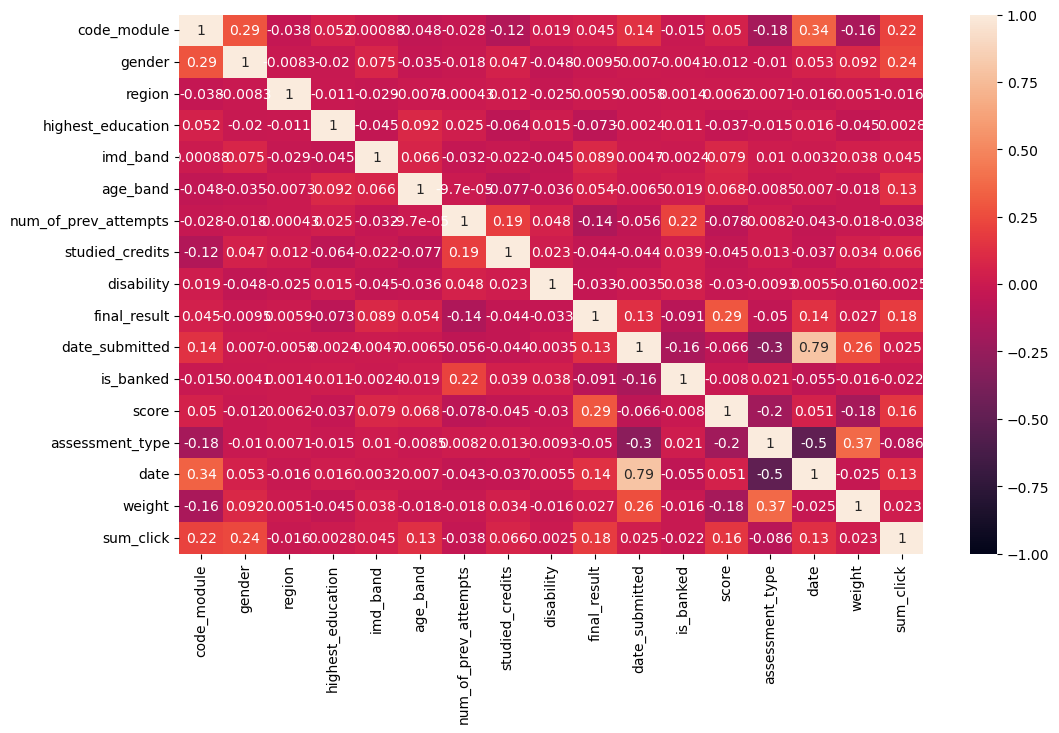

In [29]:
# ---------------------------------
# EDA Multivariate Analysis
# Visualização com Heatmap
# ---------------------------------
# Calcular a correlação do DataFrame
corr_matrix = dfs.corr()

# Criar o gráfico de calor
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)

# Salvar a figura
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')

# Mostrar o gráfico
plt.show()

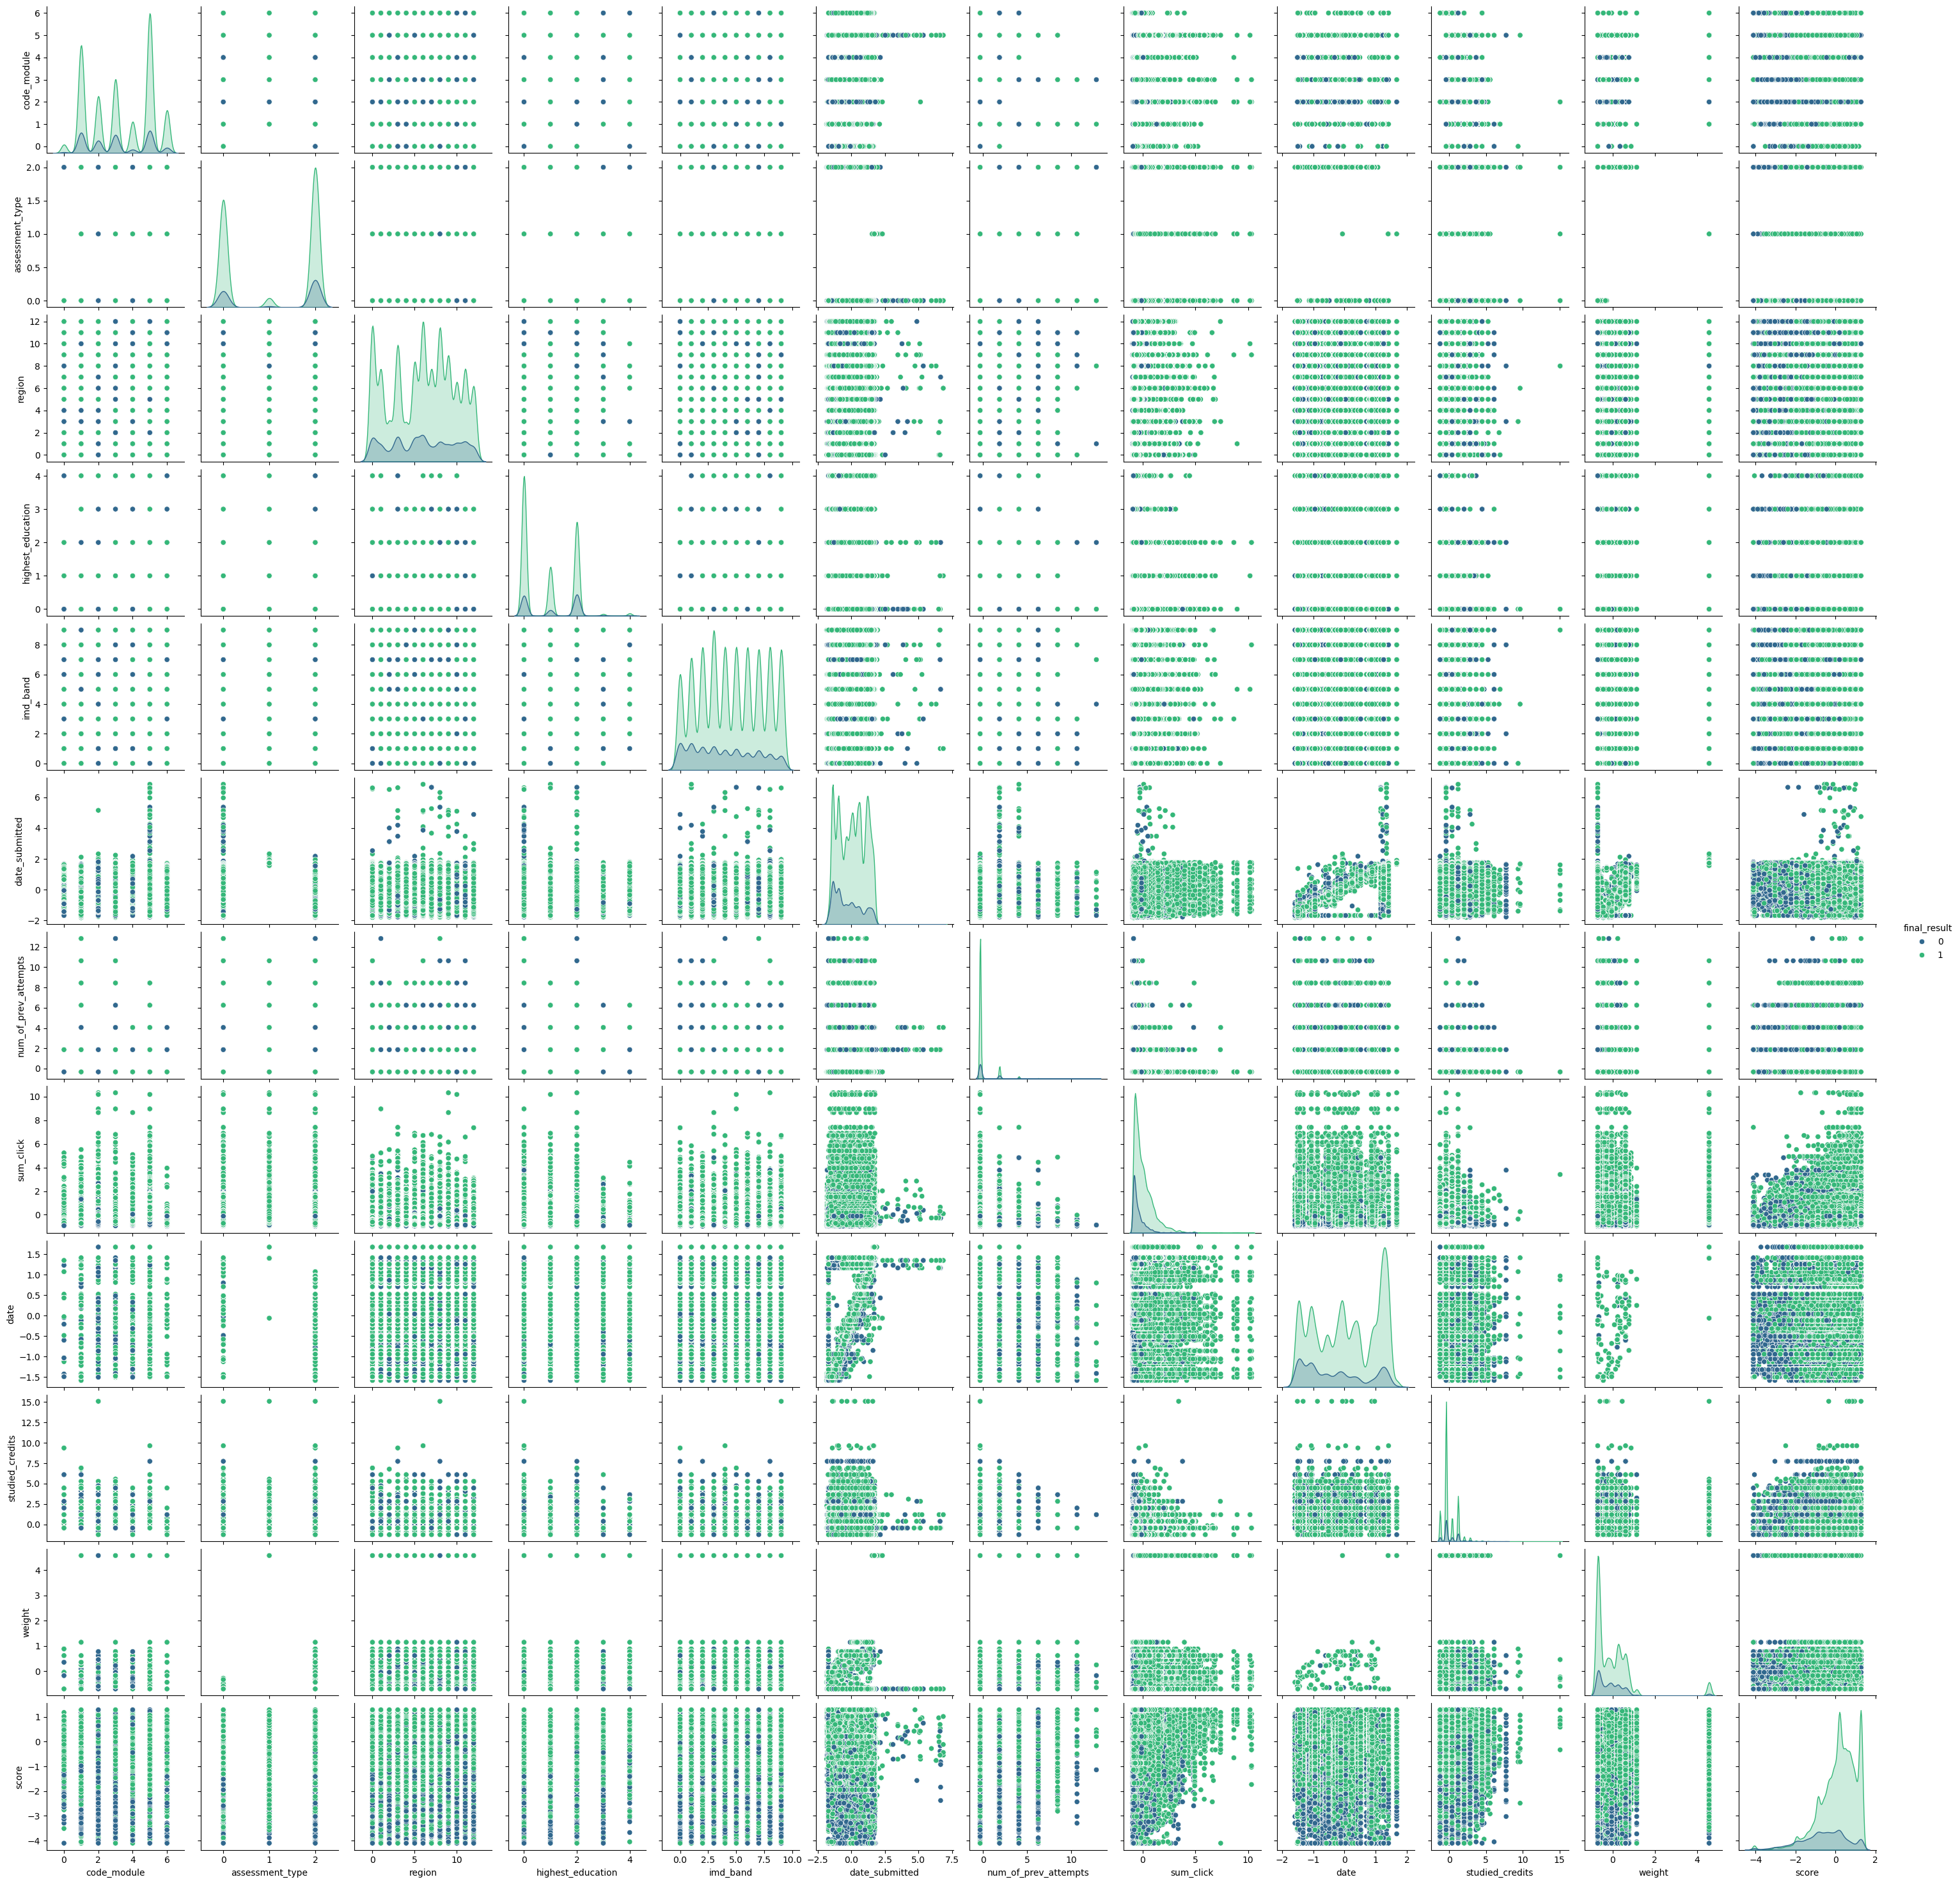

In [32]:
# ---------------------------------
# EDA Bivariate Analysis 
# Visualização com Pairplot
# ---------------------------------
df = dfs[[
    "assessment_type", "region", "highest_education", "imd_band", "date_submitted", "sum_click", "studied_credits", "weight", "score", "final_result"
]].copy()

# Garantir que não há valores nulos (pairplot pode dar erro com NaNs)
df = df.dropna()

# Visualização com Pairplot
sns.pairplot(df, hue="final_result", palette="viridis")
plt.savefig("pairplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# --------------------------------------------------------------
# Create a training and test set
# --------------------------------------------------------------
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.dtypes)


print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
'''

In [ ]:
# --------------------------------------------------------------
# Split feature subsets
# --------------------------------------------------------------







In [ ]:
# --------------------------------------------------------------
# Treinamento do modelo SVM
# --------------------------------------------------------------
'''
svm = SVC(probability=True)  # Probabilidade para usar as saídas de probabilidade no treino da rede neural
svm.fit(X_train, y_train)


'''


In [ ]:
# --------------------------------------------------------------
# Treinamento do modelo Random Forest
# --------------------------------------------------------------
'''
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
'''

In [ ]:

# --------------------------------------------------------------
# Previsões dos modelos base
# --------------------------------------------------------------
'''
svm_preds_train = svm.predict_proba(X_train)[:, 1]  # Usando a probabilidade da classe 1
rf_preds_train = rf.predict_proba(X_train)[:, 1]
'''

In [ ]:
# --------------------------------------------------------------
# Perform forward feature selection using simple decision tree
# --------------------------------------------------------------

In [ ]:

# --------------------------------------------------------------
# Grid search for best hyperparameters and model selection
# --------------------------------------------------------------



In [ ]:

# --------------------------------------------------------------
# Create a grouped bar plot to compare the results
# --------------------------------------------------------------



In [ ]:

# --------------------------------------------------------------
# Select best model and evaluate results
# --------------------------------------------------------------



In [ ]:

# --------------------------------------------------------------
# Select train and test data based on participant
# --------------------------------------------------------------



In [ ]:

"""
# --------------------------------------------------------------
# Indexação booleana (filtragem)
# --------------------------------------------------------------

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]



# ---------------------------------
# Visualização com Scatterplot
# ---------------------------------
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="viridis", style=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatterplot Automático")
plt.grid(True)  # Adiciona grid para melhor visualização
plt.show()

"""



def count_unique_values(df, columns):
    """
    Função para contar os valores únicos de texto em colunas específicas de um DataFrame.
    
    Parâmetros:
    df (DataFrame): O DataFrame contendo os dados.
    columns (list): Lista de colunas nas quais se deseja contar os valores únicos.
    
    Retorna:
    dict: Dicionário com o nome da coluna como chave e os counts como valor.
    """
    
    counts = {}
    for col in columns:
        counts[col] = df[col].value_counts()  # Conta os valores únicos na coluna

    return counts

def print_value_counts(counts_result):
    """
    Função para exibir os counts de valores únicos de cada coluna.
    
    Parâmetros:
    counts_result (dict): Dicionário com o nome da coluna como chave e os counts como valor.
    """
    for col, count in counts_result.items():
        print(f"Value counts for '{col}':")
        print(count)
        print("\n")


"""
studentInfo_colums = studentInfo.columns.tolist()

assessments_colums = assessments.columns.tolist()

studentInfo_result = count_unique_values(studentInfo, studentInfo_colums)
print_value_counts(studentInfo_result)

print("--------------------------------------------")

assessments_result = count_unique_values(assessments, assessments_colums)
print_value_counts(assessments_result)

"""

print("--------------------------------------------")

data_colums = data.columns.tolist()
data_result = count_unique_values(data, data_colums)
print_value_counts(data_result)



In [ ]:

# --------------------------------------------------------------
# Use best model again and evaluate results
# --------------------------------------------------------------



In [ ]:

# --------------------------------------------------------------
# Try a simpler model with the selected features
# --------------------------------------------------------------